### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#191970;">Project 5 - Predictive Modelling - Logistic Regression & LDA - Part 2

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#708098;">Project by - Madhu Narayanan  

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#708098;">Batch - July 2020

#### <span style="font-family: Arial; font-weight:regular;font-size:1.3em;color:#2F4F4F">Problem Statement

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

<b>Data Dictionary</b>

1. <b>Holiday_Package: </b>Opted for Holiday Package yes/no
2. <b>Salary: </b>Employee salary  
3. <b>age: </b>Age in years  
4. <b>educ: </b>Years of formal education  
5. <b>no_young_children: </b>The number of young children (younger than 7 years)
6. <b>no_older_children: </b>Number of older children  
7. <b>foreign: </b>foreigner Yes/No

 	 
 	 
 	 
 	
 	 
 	

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#2F4F4F">Import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer

from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#2F4F4F">Extracting the dataset which is a csv file format

In [2]:
hp_data=pd.read_csv("Holiday_Package.csv")

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [3]:
hp_data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
hp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


The dataset has 8 attributes, where Predictor class 'Holiday Packeage' and one independant variable 'foreign' are object dtype and rest are integer types.

There are no missing values. 6 variables are numeric and remaining categorical. Categorical variables are not in encoded format.

The Unnamed variable is a unique identification or a serial number which will not be useful for our analysis. Therfore we shall drop the variable.


In [5]:
hp_data.drop(['Unnamed: 0'],axis=1,inplace=True)

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Check for duplicate data

In [6]:
dups = hp_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(hp_data.shape)

Number of duplicate rows = 0
(872, 7)


There are NO duplicates that needs to be removed.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Geting unique counts of all Objects

In [7]:
hp_data['Holliday_Package'].value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [8]:
hp_data['no_young_children'].value_counts(normalize=True)

0    0.762615
1    0.168578
2    0.063073
3    0.005734
Name: no_young_children, dtype: float64

In [9]:
hp_data['no_older_children'].value_counts(normalize=True)

0    0.450688
2    0.238532
1    0.227064
3    0.063073
4    0.016055
6    0.002294
5    0.002294
Name: no_older_children, dtype: float64

In [10]:
hp_data['foreign'].value_counts(normalize=True)

no     0.752294
yes    0.247706
Name: foreign, dtype: float64

In [11]:
for feature in hp_data.columns: 
    if hp_data[feature].dtype == 'object': 
        print(feature)
        print(hp_data[feature].value_counts())
        print('\n')
        

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [12]:
hp_data['no_young_children'].value_counts().sort_index()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [13]:
hp_data.groupby(["Holliday_Package"]).count()

,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,
no,471,471,471,471,471,471
yes,401,401,401,401,401,401


In [14]:
hp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Checking the spread of the data using boxplot for the continuous variables.

Shape before Outliers Treatment (872, 7)


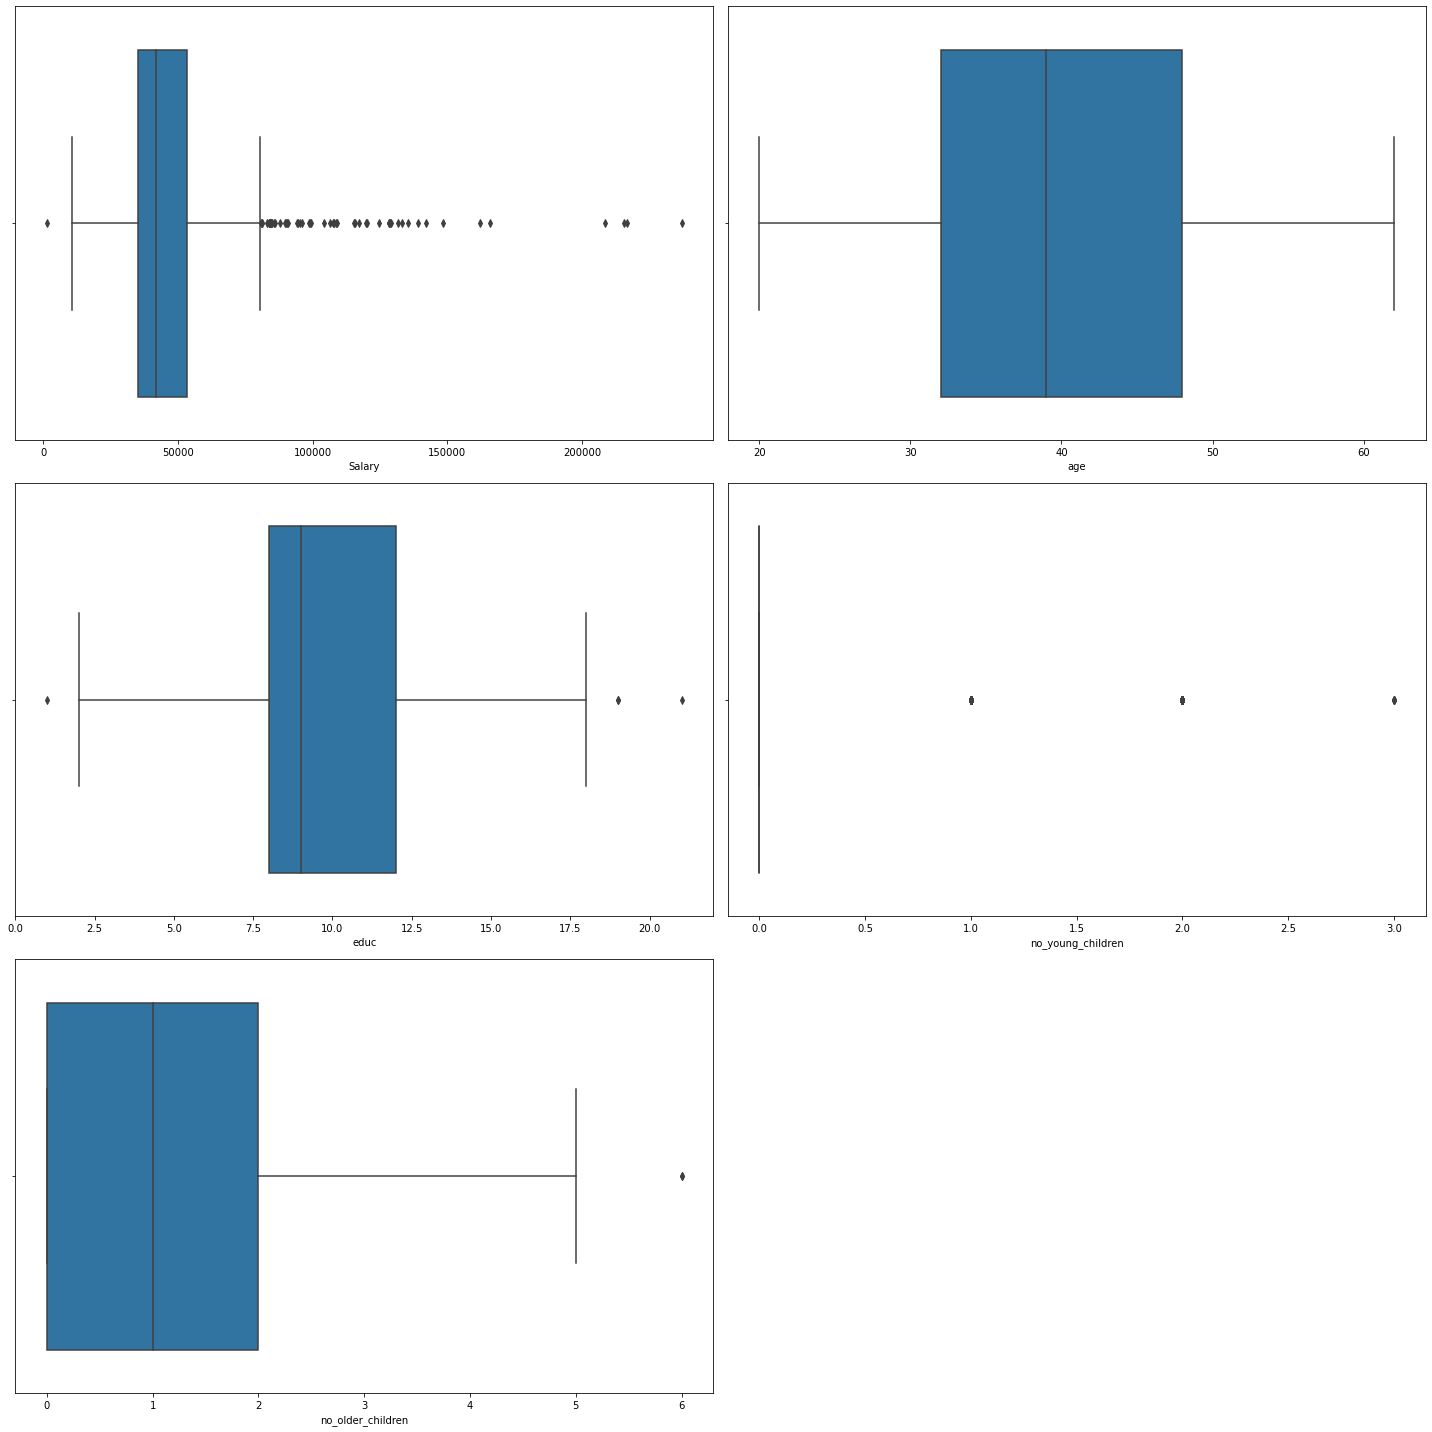

In [15]:
hp_data_plot=hp_data[['Salary','age','educ','no_young_children','no_older_children']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(hp_data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(hp_data_plot[hp_data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',hp_data.shape)

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Treating the outliers.

In [16]:
Q1 = hp_data.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = hp_data.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [17]:
lower_range

Salary               8105.75
age                     8.00
educ                    2.00
no_young_children       0.00
no_older_children      -3.00
dtype: float64

In [18]:
upper_range

Salary               80687.75
age                     72.00
educ                    18.00
no_young_children        0.00
no_older_children        5.00
dtype: float64

In [19]:
hp_data['Salary']=np.where(hp_data['Salary']>80687.75,80687.75,hp_data['Salary'])
hp_data['Salary']=np.where(hp_data['Salary']<8105.75,8105.75,hp_data['Salary'])

hp_data['educ']=np.where(hp_data['educ']>18,18,hp_data['educ'])
hp_data['educ']=np.where(hp_data['educ']<2,2,hp_data['educ'])


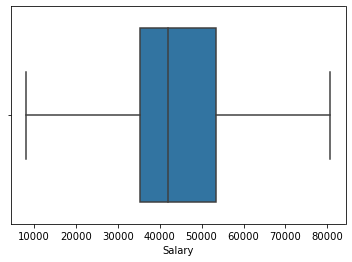

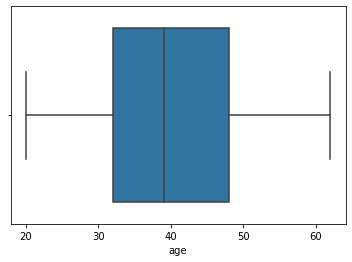

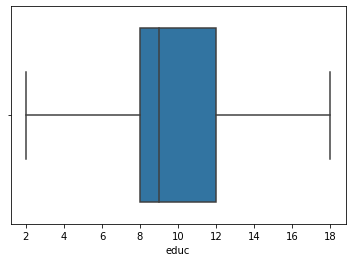

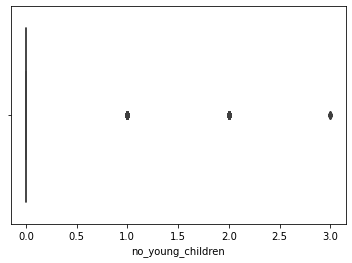

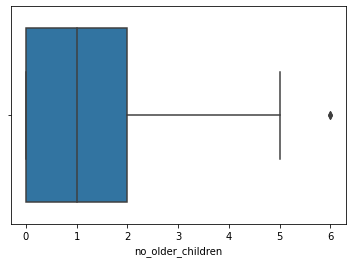

Shape after Outliers Treatment (872, 7)


In [20]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(hp_data[i],whis=1.5)
    plt.show();
print('Shape after Outliers Treatment',hp_data.shape)

There were outliers in the dataset, however the continuous varibales of 'Salary' & 'educ' was alone treated. Object variables did not require the treatment. However 'age'variable is not treated so as retain the original data as well no anomoly found like 0/-ve and age>100 etc. The min age is 20 and max is 62.  

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">Converting all objects to categorical codes

In [21]:
for feature in hp_data.columns: 
    if hp_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(hp_data[feature].unique()))
        print(pd.Categorical(hp_data[feature].unique()).codes)
        hp_data[feature] = pd.Categorical(hp_data[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [22]:
hp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    int8   
dtypes: float64(1), int64(4), int8(2)
memory usage: 35.9 KB


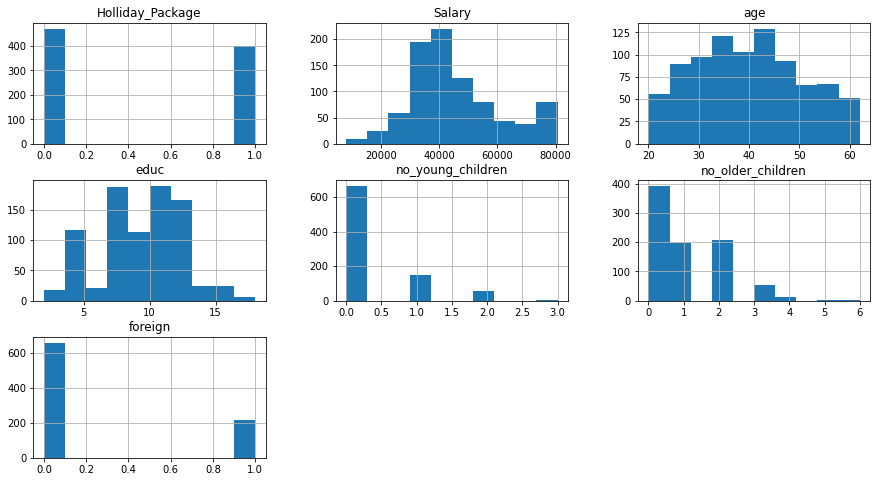

In [23]:
rcParams['figure.figsize'] = 15,8
hp_data.hist();

In [24]:
hp_data.describe().T #five-point summary after outlier treatment

,count,mean,std,min,25%,50%,75%,max
Holliday_Package,872.0,0.459862,0.498672,0.00,0.0,0.0,1.0,1.00
Salary,872.0,45608.336869,15699.745151,8105.75,35324.0,41903.5,53469.5,80687.75
age,872.0,39.955275,10.551675,20.00,32.0,39.0,48.0,62.00
educ,872.0,9.302752,3.014712,2.00,8.0,9.0,12.0,18.00
no_young_children,872.0,0.311927,0.612870,0.00,0.0,0.0,0.0,3.00
no_older_children,872.0,0.982798,1.086786,0.00,0.0,1.0,2.0,6.00
foreign,872.0,0.247706,0.431928,0.00,0.0,0.0,0.0,1.00


#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Checking for Correlations.

In [25]:
hp_data.corr()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,1.000000,-0.180214,-0.092311,-0.101116,-0.173115,0.080286,0.254096
Salary,-0.180214,1.000000,0.047029,0.352913,-0.034360,0.121993,-0.239387
age,-0.092311,0.047029,1.000000,-0.149682,-0.519093,-0.116205,-0.107148
educ,-0.101116,0.352913,-0.149682,1.000000,0.097342,-0.035904,-0.420922
no_young_children,-0.173115,-0.034360,-0.519093,0.097342,1.000000,-0.238428,0.085111
no_older_children,0.080286,0.121993,-0.116205,-0.035904,-0.238428,1.000000,0.021317
foreign,0.254096,-0.239387,-0.107148,-0.420922,0.085111,0.021317,1.000000


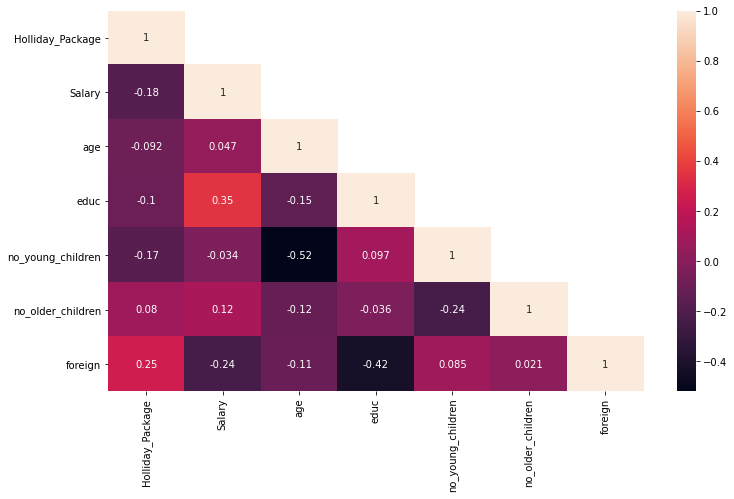

In [26]:
plt.figure(figsize=(12,7))
sns.heatmap(hp_data.corr(), annot=True,mask=np.triu(hp_data.corr(),+1));

The correlation between variables is inferred through the heat-map:  

    1. The independent variables are not correlated to each other hence there may not be multicollinearity.  
    2. age - no_young_children is most negatively correlated with -0.52 followed by educ-foreign with -0.42.   
    3. Salary - edu is the most positively correlated with 0.35.    
    4. The independent variables are not correlated to the dependent variable 'Holiday_Package'.   
    5. There is hardly any correlation between the numeric variables.

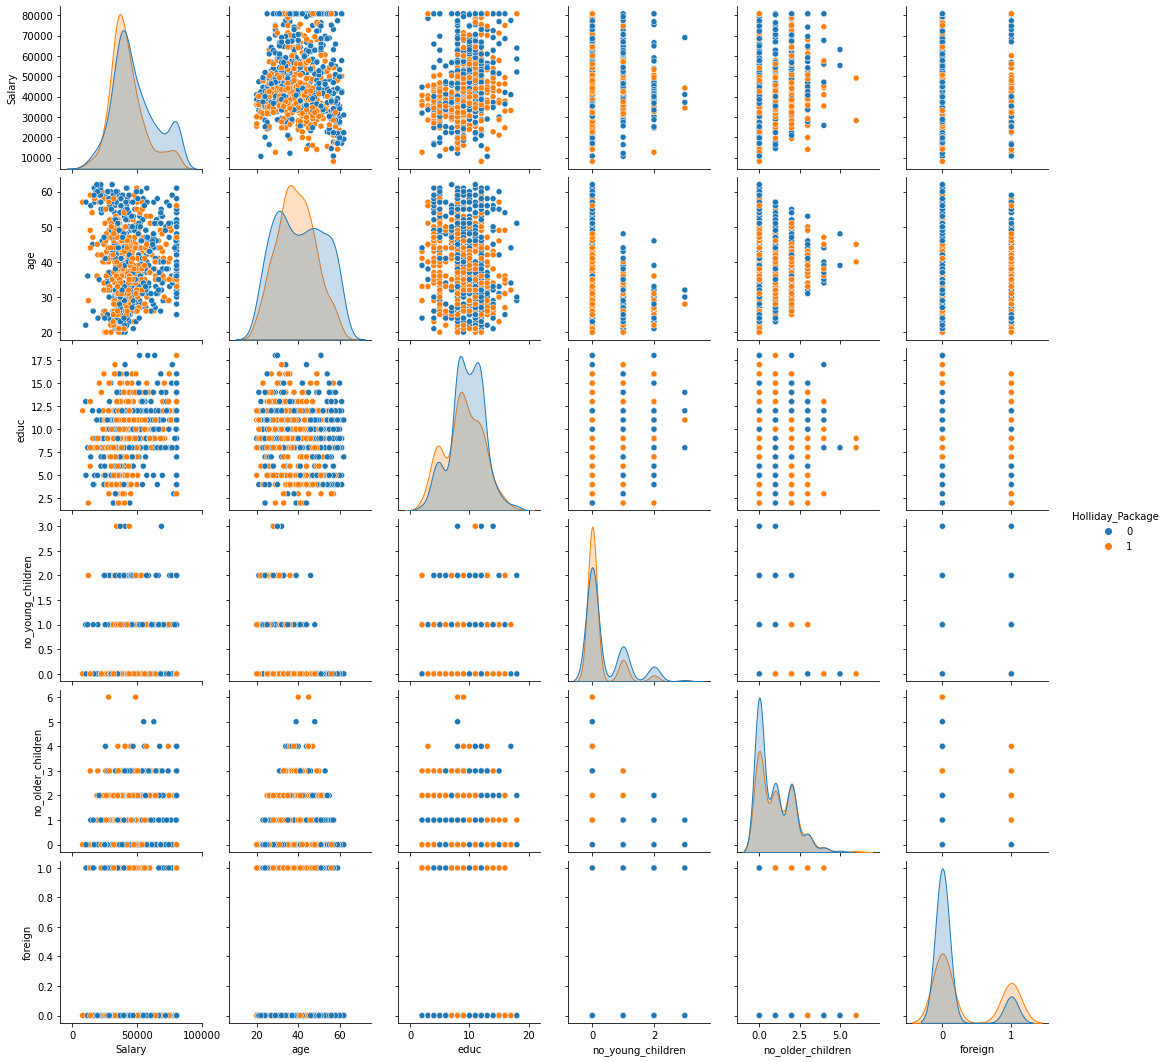

In [27]:
# Pairplot using sns
sns.pairplot(hp_data ,diag_kind='kde',hue='Holliday_Package');

The diagonals of the pairplot is a good visualiser for understanding how the classes are distributed and separated. If the classes are well separated (blue & orange distribution) then LDA model can be a good predictor/classifier and if the classes are not separated, then Logistic regression can play a good role.

Also presence or normally distributed variables can be a good contributor in predicting/classifying the dependant variable. In this case age, education and Salary are good variables to predict and classify. Logically also this hold good.

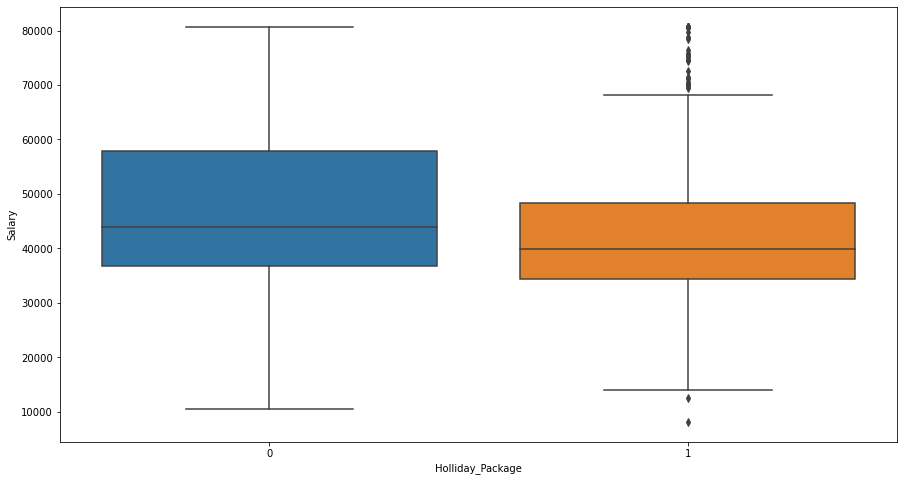

In [28]:
sns.boxplot(hp_data['Holliday_Package'],hp_data['Salary']);


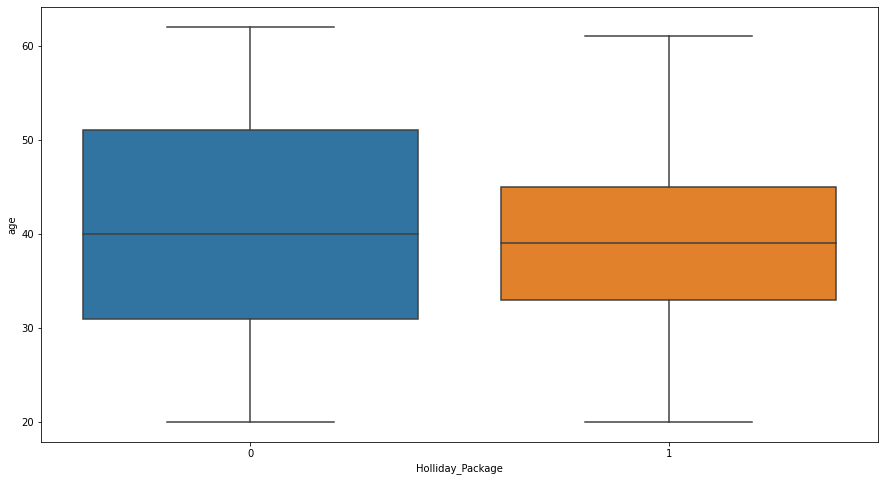

In [29]:
sns.boxplot(hp_data['Holliday_Package'],hp_data['age']);

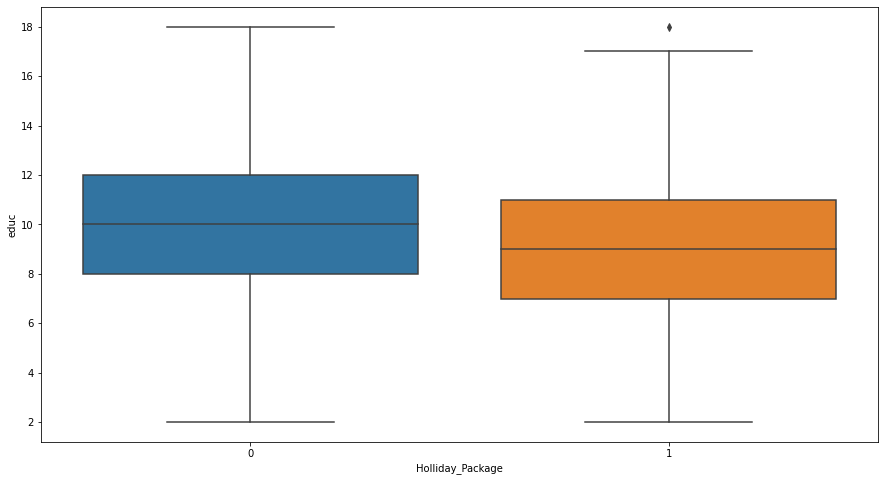

In [30]:
sns.boxplot(hp_data['Holliday_Package'],hp_data['educ']);

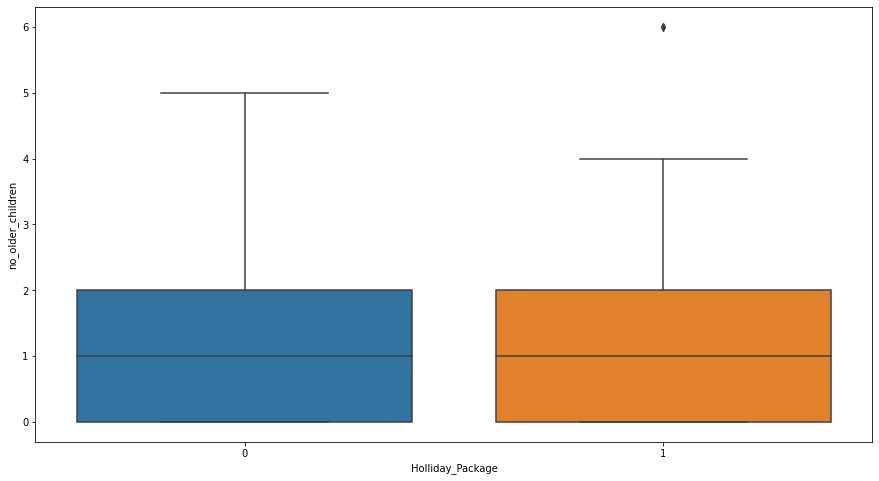

In [31]:
sns.boxplot(hp_data['Holliday_Package'],hp_data['no_older_children']);

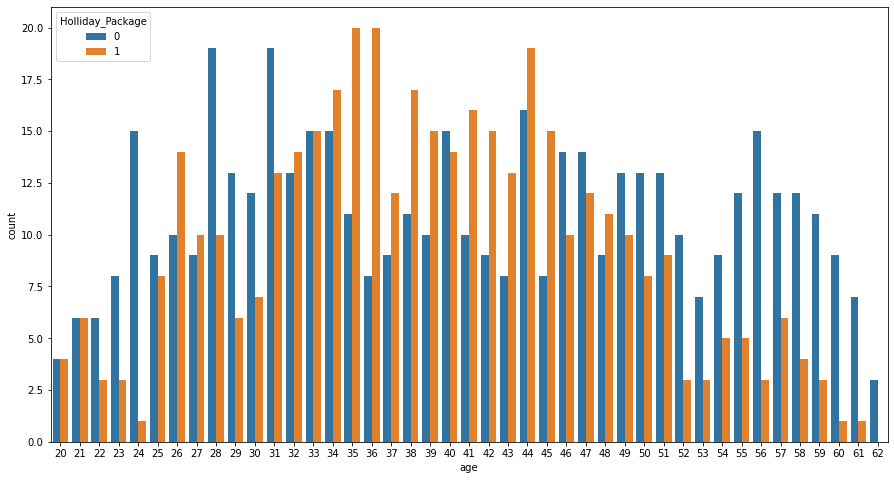

In [32]:
sns.countplot('age',hue='Holliday_Package',data=hp_data);

Age groups of 26, 33-45 are people who are opting for Holiday packages. This is a good indicator.

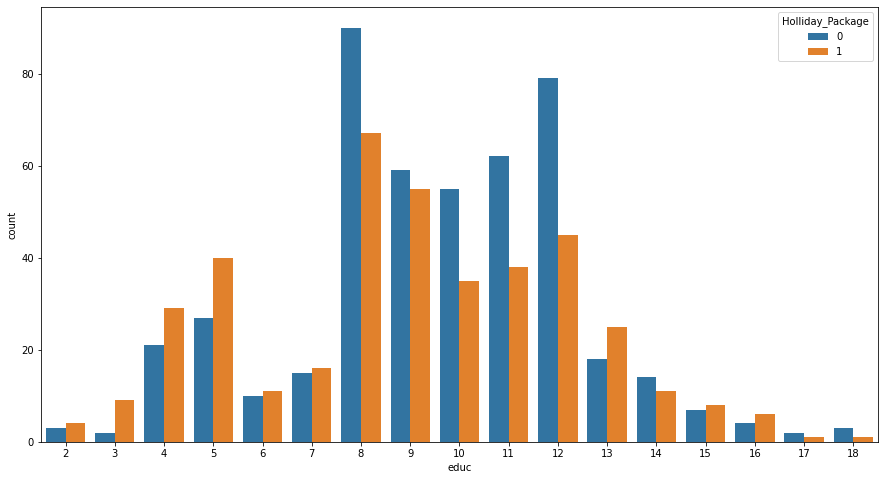

In [33]:
sns.countplot('educ',hue='Holliday_Package',data=hp_data);

People with No: of years educated between 8 & 9 are high on opting for holiday package, however this may not be logically a good determinant as Salary variable can overturn this.

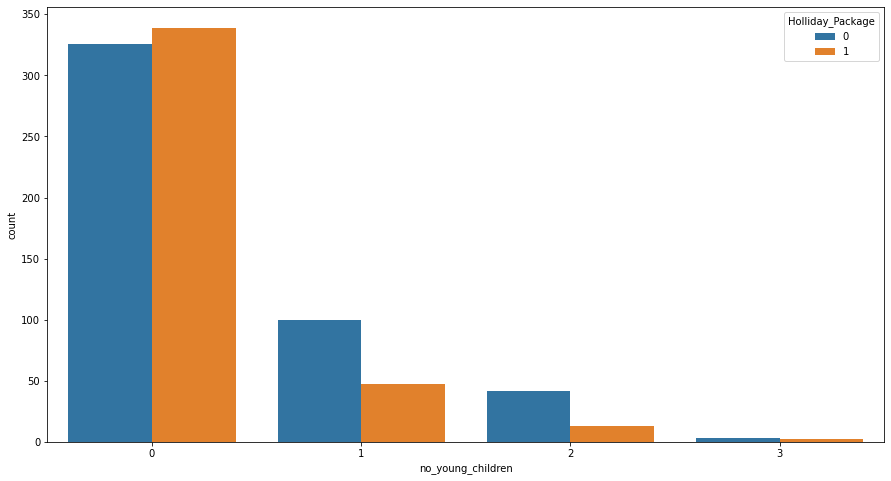

In [34]:
sns.countplot('no_young_children',hue='Holliday_Package',data=hp_data);

People with no children <7years old are the highest in opting for the Holiday package.

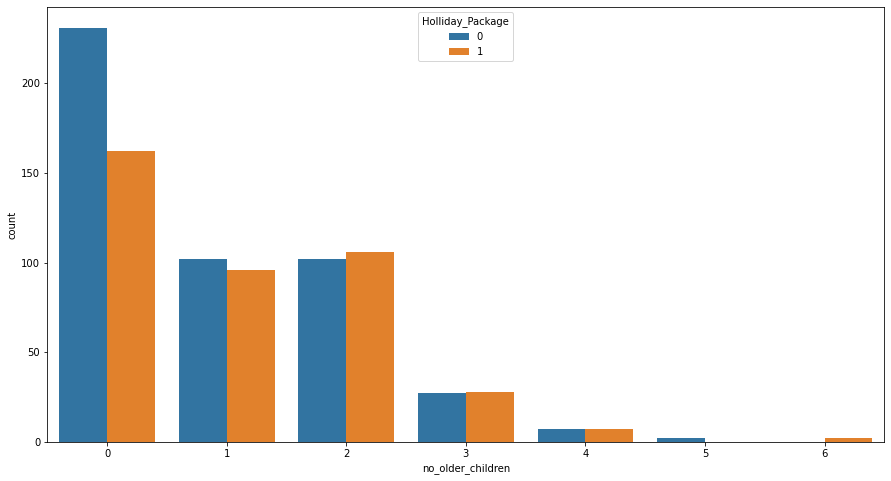

In [35]:
sns.countplot('no_older_children',hue='Holliday_Package',data=hp_data);

People with no children, children upto 2 >7years old are the contributing high in opting for the Holiday package.

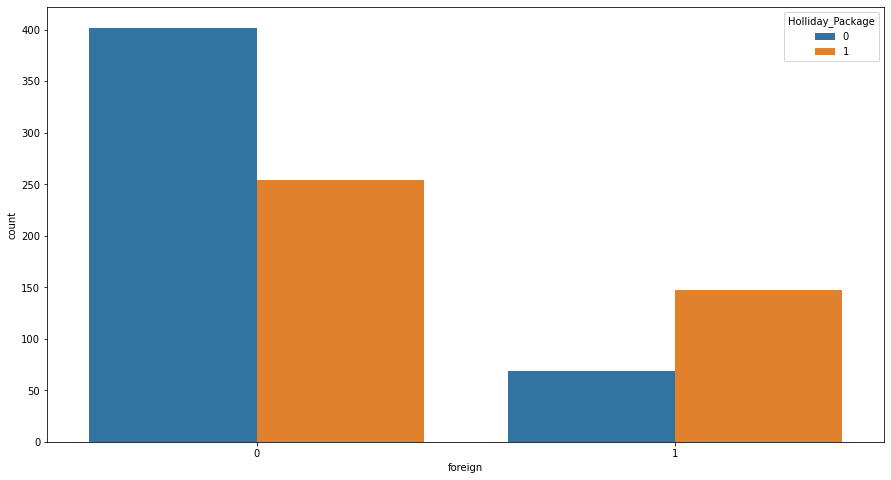

In [36]:
sns.countplot('foreign',hue='Holliday_Package',data=hp_data);

Overall, Natives are opting for Holiday packages than the foreigners. However among foreigners, people opting for Holiday packages are more compared to people not opting.

In [37]:
hp_data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">Train Test Split

In [38]:
df = hp_data.copy()

In [39]:
# Logistic Regression

X = hp_data.drop('Holliday_Package', axis=1) 
y = hp_data['Holliday_Package']



In [40]:
# LDA

LDA_X = df.drop('Holliday_Package',axis=1)
LDA_Y = df.pop('Holliday_Package')

In [41]:
# Split X and y into training and test set in 70:30 ratio for Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [42]:
# Split X and y into training and test set in 70:30 ratio for LDA

LDA_X_train,LDA_X_test,LDA_Y_train,LDA_Y_test = model_selection.train_test_split(LDA_X,LDA_Y, test_size=0.30,random_state=1,stratify = LDA_Y)

In [43]:
print('# Shape of dataset - Logistic Regression \n')
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

# Shape of dataset - Logistic Regression 

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [44]:
print('# Shape of dataset - LDA \n')
print('Number of rows and columns of the training set for the independent variables:',LDA_X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',LDA_Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',LDA_X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',LDA_Y_test.shape)

# Shape of dataset - LDA 

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">Proportion of Classes of target variable in both Train and Test

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F"> for Logistic Regression

In [45]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [46]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">for LDA

In [47]:
LDA_Y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [48]:
LDA_Y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

For both the models, the data-set is of proportion ~54:46 which is a balanced data-set for analysis and prediction.

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">Logistic Regression Model

We are making some adjustments to the parameters in the Logistic Regression Class to get a better accuracy. 

In [49]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',penalty='none',max_iter=10000,verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">LDA Model

In [50]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(LDA_X_train,LDA_Y_train)

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">Predicting on Training and Test dataset

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">for Logistic Regression

In [51]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">for LDA

In [52]:
pred_class_train = model.predict(LDA_X_train)
pred_class_test = model.predict(LDA_X_test)

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Getting the Predicted Classes and Probs

In [53]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.689178,0.310822
1,0.528852,0.471148
2,0.703028,0.296972
3,0.497433,0.502567
4,0.574602,0.425398


In [54]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(LDA_X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(LDA_X_test)

In [55]:
pred_prob_train[:,1]

array([0.73551768, 0.28353533, 0.39649058, 0.75922189, 0.47003003,
       0.40177036, 0.36986276, 0.3046299 , 0.60482453, 0.64266073,
       0.23173951, 0.25792362, 0.35900888, 0.04498625, 0.2829094 ,
       0.3643531 , 0.54782489, 0.30634075, 0.58914069, 0.6607117 ,
       0.62795172, 0.26530773, 0.88138953, 0.33411259, 0.08664023,
       0.8271775 , 0.19379564, 0.75733957, 0.53209164, 0.1892203 ,
       0.29258073, 0.3384893 , 0.3769479 , 0.38097484, 0.31056554,
       0.29449197, 0.10973564, 0.56147758, 0.48217964, 0.19474058,
       0.22634057, 0.7985467 , 0.50039742, 0.73794034, 0.7904354 ,
       0.3690023 , 0.30262021, 0.93345931, 0.43331819, 0.72155301,
       0.71677925, 0.45274194, 0.78744639, 0.37233837, 0.19187097,
       0.74091501, 0.25003165, 0.51612541, 0.67432724, 0.35616917,
       0.61002822, 0.52758233, 0.52261599, 0.40993742, 0.57008809,
       0.61654303, 0.12380369, 0.56372873, 0.40105364, 0.27636387,
       0.331064  , 0.74844526, 0.77913611, 0.21862757, 0.44518

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">Model Evaluation

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">for Logistic Regression

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">AUC and ROC for the training data

AUC: 0.731


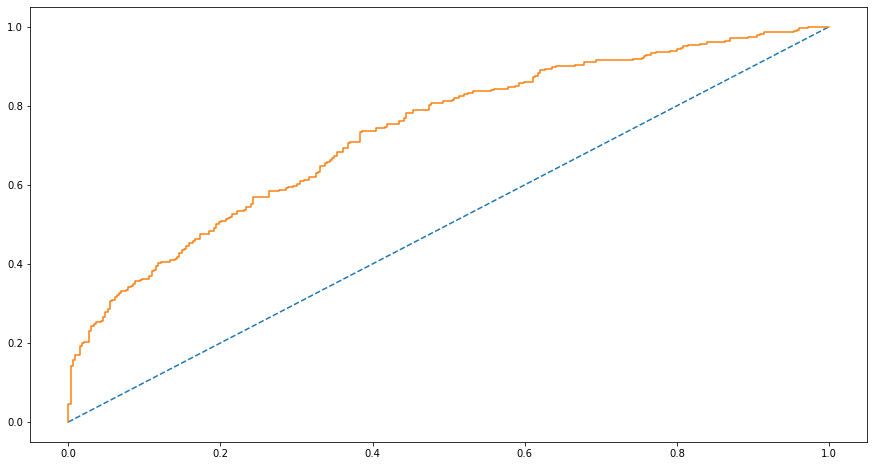

In [56]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logr_train_auc)
# calculate roc curve
logr_train_fpr, logr_train_tpr, logr_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logr_train_fpr, logr_train_tpr);

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">AUC and ROC for the test data

AUC: 0.713


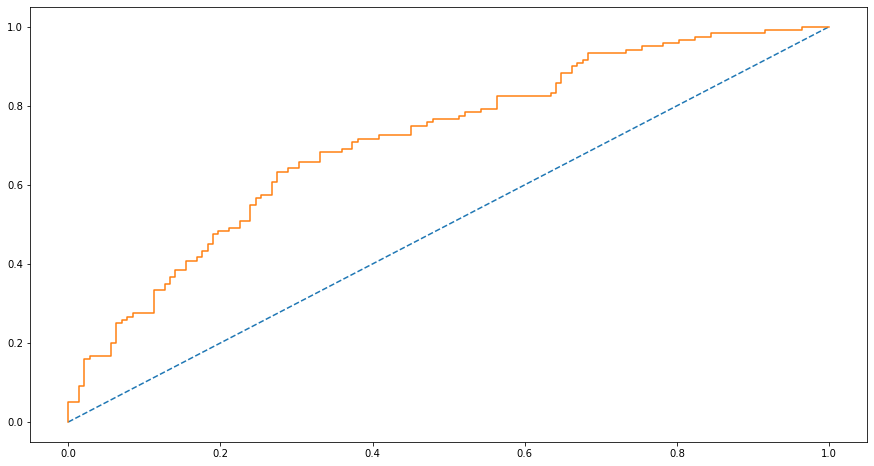

In [57]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logr_test_auc)
# calculate roc curve
logr_test_fpr, logr_test_tpr, logr_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logr_test_fpr, logr_test_tpr);

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Confusion Matrix for the training data

In [58]:
confusion_matrix(y_train, ytrain_predict)

array([[242,  87],
       [121, 160]])

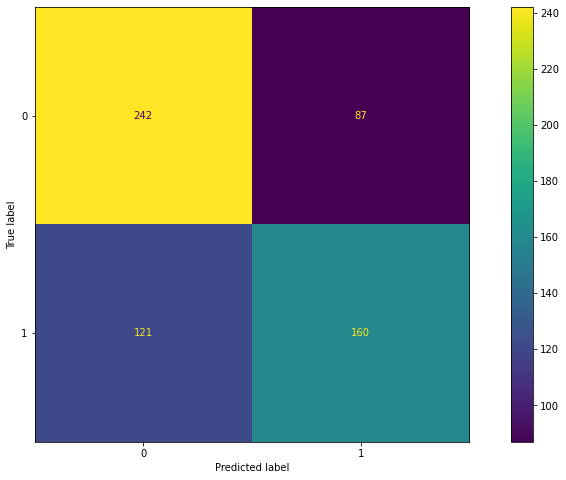

In [59]:
plot_confusion_matrix(model,X_train,y_train);

In [60]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.66       610



#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Confusion Matrix for test data

In [61]:
confusion_matrix(y_test, ytest_predict)

array([[108,  34],
       [ 58,  62]])

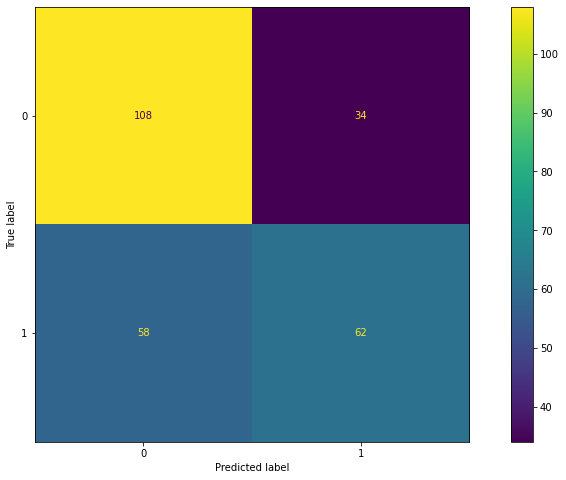

In [62]:
plot_confusion_matrix(model,X_test,y_test);

In [63]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Applying GridSearchCV for Logistic Regression

In [64]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','saga','liblinear','newton-cg'],
      'tol':[0.001,0.0001,0.00001]}

In [65]:
model = LogisticRegression(max_iter=100000)

In [66]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=2,scoring='f1')

In [67]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000), n_jobs=2,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'saga', 'liblinear',
                                    'newton-cg'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [68]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.001} 

LogisticRegression(max_iter=100000, penalty='none', solver='newton-cg',
                   tol=0.001)


In [69]:
best_model = grid_search.best_estimator_

In [70]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [71]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.677957,0.322043
1,0.535264,0.464736
2,0.692006,0.307994
3,0.489969,0.510031
4,0.571857,0.428143


              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



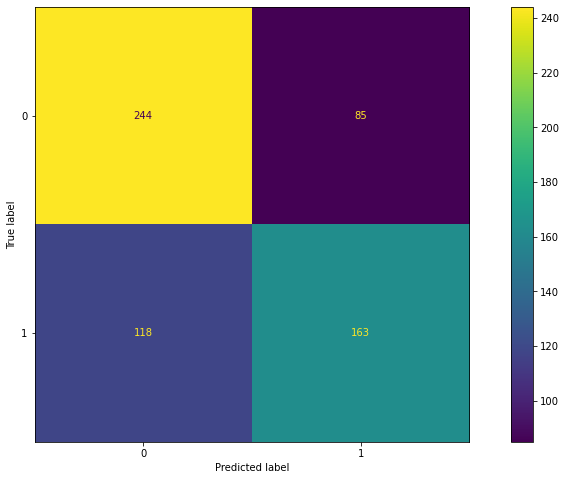

In [72]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

In [73]:
logr_metrics=classification_report(y_train,ytrain_predict,output_dict=True)
logr_df=pd.DataFrame(logr_metrics).transpose()
logr_train_precision=round(logr_df.loc["1"][0],2)
logr_train_recall=round(logr_df.loc["1"][1],2)
logr_train_f1=round(logr_df.loc["1"][2],2)
print ('logr_train_precision ',logr_train_precision)
print ('logr_train_recall ',logr_train_recall)
print ('logr_train_f1 ',logr_train_f1)

logr_train_precision  0.66
logr_train_recall  0.58
logr_train_f1  0.62


In [74]:
logr_train_acc=best_model.score(X_train,y_train)
logr_train_acc

0.6672131147540984

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



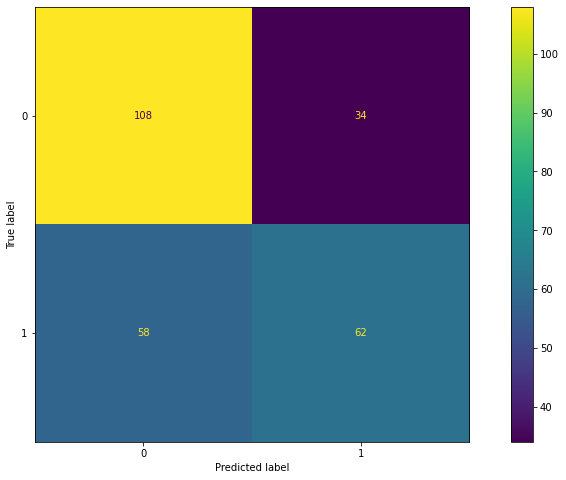

In [75]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [76]:
logr_metrics=classification_report(y_test,ytest_predict,output_dict=True)
logr_df=pd.DataFrame(logr_metrics).transpose()
logr_test_precision=round(logr_df.loc["1"][0],2)
logr_test_recall=round(logr_df.loc["1"][1],2)
logr_test_f1=round(logr_df.loc["1"][2],2)
print ('logr_train_precision ',logr_test_precision)
print ('logr_train_recall ',logr_test_recall)
print ('logr_train_f1 ',logr_test_f1)

logr_train_precision  0.65
logr_train_recall  0.52
logr_train_f1  0.57


In [77]:
logr_test_acc=best_model.score(X_test, y_test)
logr_test_acc

0.648854961832061

You can select other parameters to perform GridSearchCV and try optimize the desired parameter.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">for LDA

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Training Data and Test Data Confusion Matrix Comparison

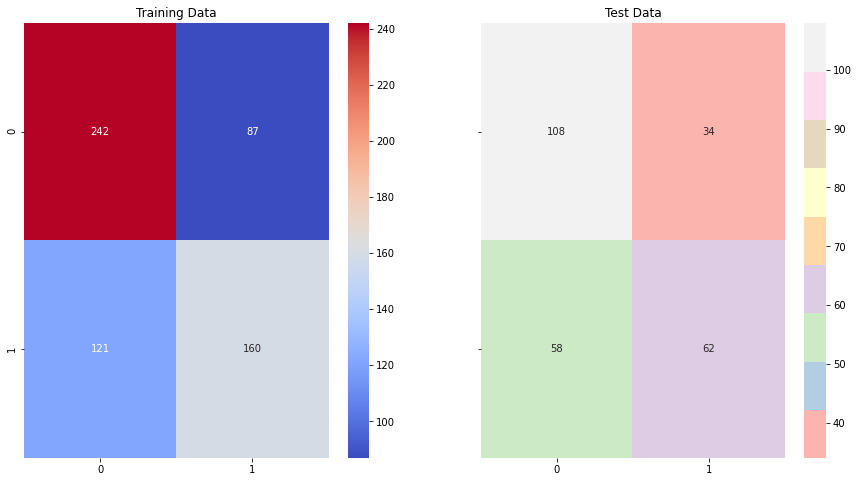

In [78]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(LDA_Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(LDA_Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Pastel1',ax=a[0][1]);
a[0][1].set_title('Test Data');

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Training Data and Test Data Classification Report Comparison

In [79]:
print('Classification Report of the training data:\n\n',metrics.classification_report(LDA_Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(LDA_Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Probability prediction for the training and test data

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">AUC and ROC for the training data

AUC for the Training Data: 0.731
AUC for the Test Data: 0.713


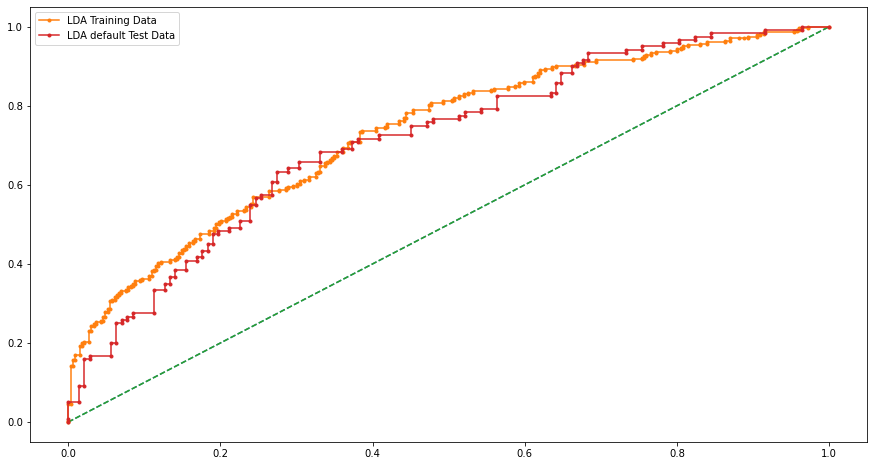

In [80]:
# AUC and ROC for the training data

# calculate AUC
LDA_train_auc = metrics.roc_auc_score(LDA_Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % LDA_train_auc)

#  calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = metrics.roc_curve(LDA_Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr, marker='.',label = 'LDA Training Data')


# AUC and ROC for the test data

# calculate AUC
LDA_test_auc = metrics.roc_auc_score(LDA_Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % LDA_test_auc)

#  calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = metrics.roc_curve(LDA_Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr, marker='.',label='LDA default Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F"> Change the cut-off values for maximum accuracy

0.1 

Accuracy Score 0.4738
F1 Score 0.6356 

Confusion Matrix


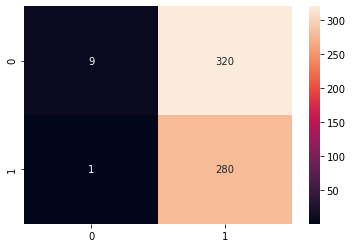

0.2 

Accuracy Score 0.523
F1 Score 0.6498 

Confusion Matrix


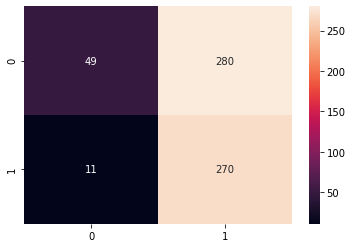

0.3 

Accuracy Score 0.6066
F1 Score 0.6774 

Confusion Matrix


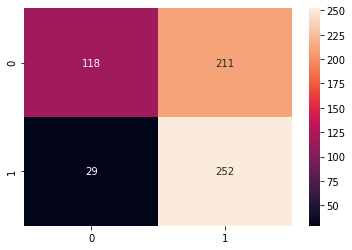

0.4 

Accuracy Score 0.6607
F1 Score 0.6667 

Confusion Matrix


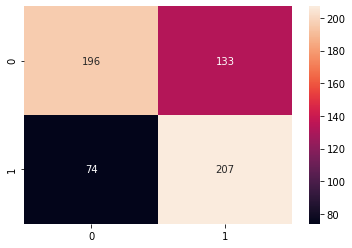

0.5 

Accuracy Score 0.659
F1 Score 0.6061 

Confusion Matrix


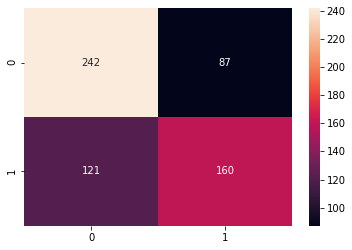

0.6 

Accuracy Score 0.6525
F1 Score 0.5225 

Confusion Matrix


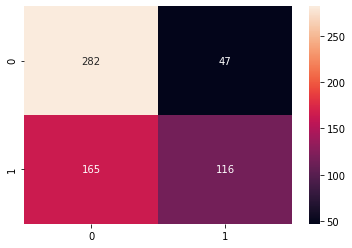

0.7 

Accuracy Score 0.6443
F1 Score 0.4304 

Confusion Matrix


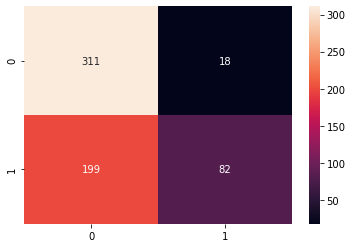

0.8 

Accuracy Score 0.5902
F1 Score 0.2038 

Confusion Matrix


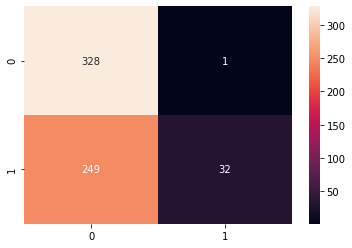

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


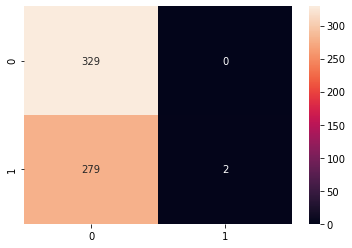

In [81]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(LDA_Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(LDA_Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(LDA_Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(LDA_Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Predicting the classes on the custom cut-off test data



In [82]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

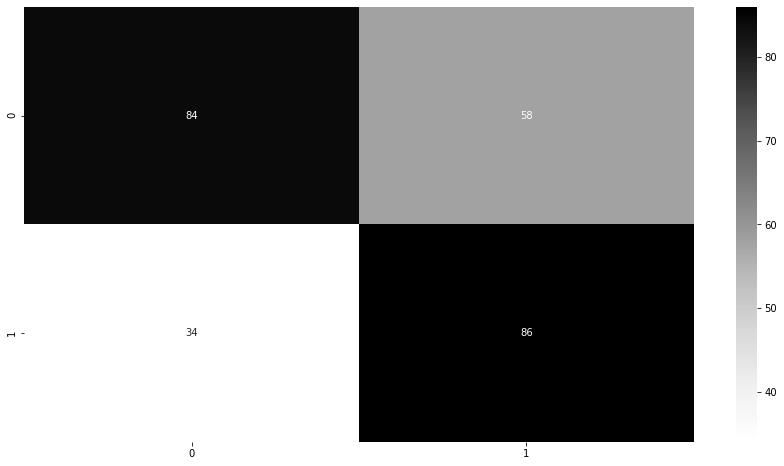

In [83]:
sns.heatmap((metrics.confusion_matrix(LDA_Y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">AUC and ROC for the test data

AUC for the Training Data: 0.731
AUC for the Test Data: 0.654


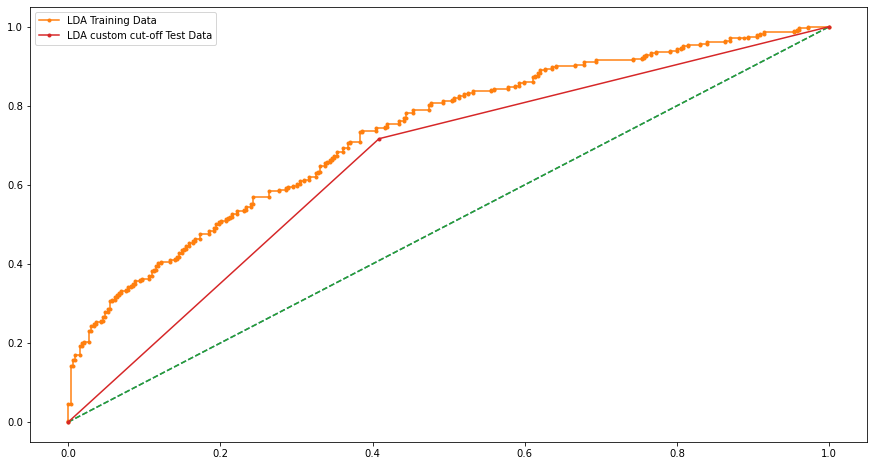

In [84]:
# AUC and ROC for the training data

# calculate AUC - train
LDA_train_auc = metrics.roc_auc_score(LDA_Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % LDA_train_auc)

#  calculate roc curve - train
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = metrics.roc_curve(LDA_Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr, marker='.',label = 'LDA Training Data')


# calculate AUC - custom cut-off test
LDA_co_auc = metrics.roc_auc_score(LDA_Y_test,data_pred_custom_cutoff)
print('AUC for the Test Data: %.3f' % LDA_co_auc)

#  calculate roc curve - custom cut-off test
LDA_co_fpr, LDA_co_tpr, LDA_co_thresholds = metrics.roc_curve(LDA_Y_test,data_pred_custom_cutoff)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_co_fpr, LDA_co_tpr, marker='.',label='LDA custom cut-off Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [85]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(LDA_Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(LDA_Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.71      0.59      0.65       142
           1       0.60      0.72      0.65       120

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.65       262
weighted avg       0.66      0.65      0.65       262
 



In [86]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(LDA_X_train,LDA_Y_train)

In [87]:
LDA_train_metrics=classification_report(LDA_Y_train,pred_class_train,output_dict=True)
LDA_train_df=pd.DataFrame(LDA_train_metrics).transpose()
LDA_train_precision=round(LDA_train_df.loc["1"][0],2)
LDA_train_recall=round(LDA_train_df.loc["1"][1],2)
LDA_train_f1=round(LDA_train_df.loc["1"][2],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.65
LDA_train_recall  0.57
LDA_train_f1  0.61


In [88]:
LDA_train_acc = model.score(LDA_X_train,LDA_Y_train)
LDA_train_acc

0.659016393442623

In [89]:
LDA_test_metrics=classification_report(LDA_Y_test,pred_class_test,output_dict=True)
LDA_test_df=pd.DataFrame(LDA_test_metrics).transpose()
LDA_test_precision=round(LDA_test_df.loc["1"][0],2)
LDA_test_recall=round(LDA_test_df.loc["1"][1],2)
LDA_test_f1=round(LDA_test_df.loc["1"][2],2)
print ('LDA_default_test_precision ',LDA_test_precision)
print ('LDA_default_test_recall ',LDA_test_recall)
print ('LDAr_default_test_f1 ',LDA_test_f1)

LDA_default_test_precision  0.65
LDA_default_test_recall  0.52
LDAr_default_test_f1  0.57


In [90]:
LDA_test_acc = model.score(LDA_X_test,LDA_Y_test)
LDA_test_acc

0.648854961832061

In [91]:
LDA_co_metrics=classification_report(LDA_Y_test,data_pred_custom_cutoff,output_dict=True)
LDA_co_df=pd.DataFrame(LDA_co_metrics).transpose()
LDA_co_precision=round(LDA_co_df.loc["1"][0],2)
LDA_co_recall=round(LDA_co_df.loc["1"][1],2)
LDA_co_f1=round(LDA_co_df.loc["1"][2],2)
print ('LDA_custom_cut-off_test_precision ',LDA_co_precision)
print ('LDA_custom_cut-off_test_recall ',LDA_co_recall)
print ('LDA_custom_cut-off_test_f1 ',LDA_co_f1)

LDA_custom_cut-off_test_precision  0.6
LDA_custom_cut-off_test_recall  0.72
LDA_custom_cut-off_test_f1  0.65


#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Model Comparison

In [92]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[logr_train_acc,logr_train_auc,logr_train_recall,logr_train_precision,logr_train_f1],
        'Logistic Regression Test':[logr_test_acc,logr_test_auc,logr_test_recall,logr_test_precision,logr_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA default Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
        'LDA cut-off Test':[0.65,LDA_co_auc,LDA_co_recall,LDA_co_precision,LDA_co_f1],},index=index)
round(data,2) # custom cut-off accuracy score taken from Classification report 

,Logistic Regression Train,Logistic Regression Test,LDA Train,LDA default Test,LDA cut-off Test
Accuracy,0.67,0.65,0.66,0.65,0.65
AUC,0.73,0.71,0.73,0.71,0.65
Recall,0.58,0.52,0.57,0.52,0.72
Precision,0.66,0.65,0.65,0.65,0.60
F1 Score,0.62,0.57,0.61,0.57,0.65


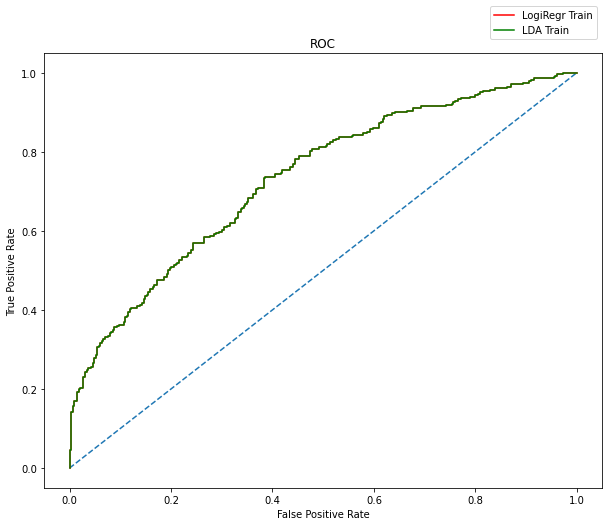

In [93]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logr_train_fpr, logr_train_tpr,color='red',label="LogiRegr Train")
plt.plot(LDA_train_fpr,LDA_train_tpr,color='green',label="LDA Train")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

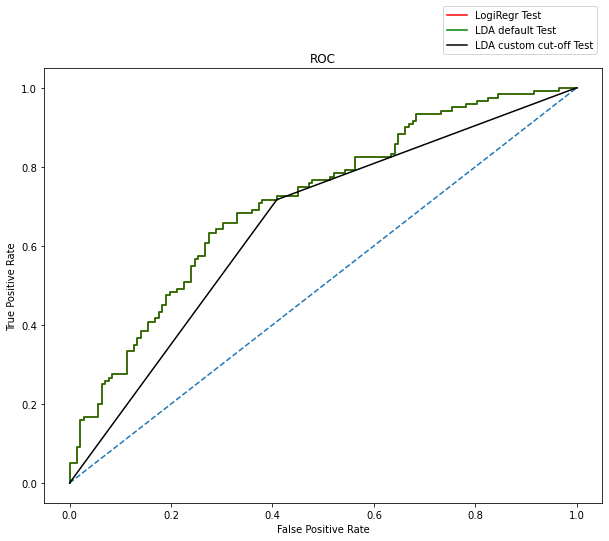

In [94]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logr_test_fpr, logr_test_tpr,color='red',label="LogiRegr Test")
plt.plot(LDA_test_fpr,LDA_test_tpr,color='green',label="LDA default Test")
plt.plot(LDA_co_fpr,LDA_co_tpr,color='black',label="LDA custom cut-off Test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Though both models are producing same prediction range, Selecting Logistic regression as better model for this case as 

        1. Simple to implement and easier to interpret the outputs coefficients.  
        
        2. Provides both probabilities and classes as output.  
        
        3. Quick to train as the error function (cross entropy) is convex , smooth and continuous.  
     
        4. Generally, Logit Can stop learning (convergence of weights) in presence of good separators of                  classes as attributes and such attributes will get a very high magnitude weights. That will need              appropriate regularization to make the model learn and generalize, however from the Pairplot                  diagonals using'kde' distribution, we can observethat the variables a=are not well separated,                  thereby the learning could be complete.  
           
        5. Logistic Regression normally assumes the attributes to be independent which is true in this case as            we can see from the pairplot, the independant variables does not have multicollinearity.
        
        6. As the business grows, more data will be and can be collected, therefore when the scale increases, Logistic regression becomes a viable model for prediction as the model can be scales for large datasets.
        
        7. The other reason why Logistic Regression is preferred over LDA in this case is that, the independant variables are not having good separators and the prediction class is binary which LDA find a bit instable   to predict clearly as the dataset grows. (Note:- LDA performs better when the datset is small) 

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">2.4 Inference: Basis on these predictions, what are the insights and recommendations.

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#000080">Insights from the data-set:
    
1. The data is well dispersed with 54:46 ratio on the predictor class. Therefore the model building can be
   done better as there balance in data.
   
        Proportion of Holiday Package 0's ('no')is:-  54 %
        Proportion of Holiday Package 1's ('yes') is:-  46 %

2. Proportion of people with no children  of <7years old-76.26%
   Proportion of people with no children of >7years old -45.07%
   Proportion of people who are not foreigners - 75.23%

3. The correlation between variables is inferred through the heat-map:
    a. The independent variables are not correlated to each other hence there may not be multicollinearity.  
    b. age - no_young_children is most negatively correlated with -0.52 followed by educ-foreign with -0.42.   
    c. Salary - edu is the most positively correlated with 0.35.    
    d. The independent variables are not correlated to the dependent variable 'Holiday_Package'.
    e. There is hardly any correlation between the numeric variables

4. The diagonals of the pair-plot is a good visualiser for understanding how the classes are distributed and
   separated. 
   If the classes are well separated (blue & orange distribution) then LDA model can be a good 
   predictor/classifier and if the classes are not separated, then Logistic regression can play a good role.
   Also presence or normally distributed variables can be a good contributor in predicting/classifying the
   dependant variable. In this case age, education and Salary are good variables to predict and classify.
   Logically also this hold good.

5. Age groups of 26, 33-45 are people who are opting for Holiday packages. This is a good indicator.    
    People with No: of years educated between 8 & 9 are high on opting for holiday package, however this may
    not be logically a good determinant as Salary variable can overturn this.  
    People with no children <7years old are the highest in opting for the Holiday package.  
    People with no children, children upto 2 >7years old are the contributing high in opting for the Holiday
    package.  
    Overall, Natives are opting for Holiday packages than the foreigners. However among foreigners, people
    opting for Holiday packages are more compared to people not opting.     
    

6. <u>Shape of dataset for both the model (Logistic Regression & LDA):</u>    

        Number of rows and columns of the training set for the independent variables: (610, 6)  
        Number of rows and columns of the training set for the dependent variable: (610,)    
        Number of rows and columns of the test set for the independent variables: (262, 6)    
        Number of rows and columns of the test set for the dependent variable: (262,)    

For both the models, the data-set is of proportion ~54:46 which is a balanced data-set for analysis and prediction.

    
#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#DC143C">Inferences from Model building:-
    
    Though both models are producing same prediction range, Selecting Logistic regression as better model for
    this case as:   

        1. Simple to implement and easier to interpret the outputs coefficients.  
        
        2. Provides both probabilities and classes as output.  
        
        3. Quick to train as the error function (cross entropy) is convex , smooth and continuous.  
     
        4. Generally, Logit Can stop learning (convergence of weights) in presence of good separators of
           classes as attributes and such attributes will get a very high magnitude weights. That will need
           appropriate regularization to make the model learn and generalize, however from the Pair-plot
           diagonals using'kde' distribution, we can observethat the variables a=are not well separated,
           thereby the learning could be complete.  
           
        5. Logistic Regression normally assumes the attributes to be independent which is true in this case
           as we can see from the pair-plot, the independant variables does not have multicollinearity.
        
        6. As the business grows, more data will be and can be collected, therefore when the scale increases,
           Logistic regression becomes a viable model for prediction as the model can be scales for large
           datasets.
        
        7. The other reason why Logistic Regression is preferred over LDA in this case is that, the
           independant variables are not having good separators and the prediction class is binary which LDA
           find a bit instable to predict clearly as the dataset grows. 
           (Note:- LDA performs better when the datset is small).  

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#006400">Recommendations to the management:
    
    1. Though both models are producing same prediction range, Selecting Logistic regression as better model
       for this case as it is simple to implement and easier to interpret the outputs of co-efficients.
    
    2. Logistic Regression is scaleable and when more and more data comes-in, the prediction will be made by
       the Logistic Regression Model.
    
    3. Foreigners are cream target for Holiday package offerings so they have to be the top priority segment.
    
    4. People with no children looks like opting for Holiday package more especially the minimum age for
       opting has been 20 in this dataset. However, people travelling alongf with them is not available in
       the datset. Therefore promote 3 types of packages predominantly like 'Buddies Package', ' Honeymon
       Delight' and 'Family'.
    
    5. Corporate Deals and Corporate Employee offers can be promoted as a cream segment, as the data shows
       higher the Salary, odds of opting for Holiday Package is high.
    
    6. Overall need to understand that the segmentation has to be done and effectiveness of every
       promotional offer needs to be validated statistically through hypothesis testing like ANOVA.
    
    7. More data has to be collected to improve the accuracy and f1-score so as to better the model.
    
    8. The major advantage of choosing Logistic Regression is that the Probabilities of success (odds of
       success) can be interpreted for every record's output.
    
    9. This data is like more of profiling customers for predicting the Class of interest. Therefore more
       data can be sourced like instead of Salary, change it to income and include business/non-salried,
       students classes.
    
    

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#006400">------------------------------------------------------------------------- End of report ---------------------------------------------------------------------------------